In [3]:
#Set the Group and the size n
n=3
W = Permutations(n);

In [4]:
def dominant_elements(W): 
    for u in W:
        if u.avoids([1,3,2]): 
            yield u
            
def square (x, y, s, color = "black"):
    return polygon([[x,y], [x+s,y],[x+s,y+s],[x,y+s]], color = color)

def lehmer_diagram(w): 
    out = []
    
    for i in range(0, len(w)):
        for j in range(i + 1, len(w)):
            if w[i] > w[j]: 
                out.append((i, w[j] - 1))
    
    return out;

def interval_diagram (u, v, color): 
    n = len(u)
    out = [polygon([[0,0], [n,0],[n,n],[0,n]], color = "#EEEEEE", axes = False)];
    
    for (x, y) in lehmer_diagram(v):
        out.append(square(x, n - y - 1, 1, color));

    for i in range(0, len(u)):
        out.append(circle((i + .5, n - (u[i] + .5) + 1),.1, color="grey", thickness=3))
        
    for i in range(0, n):
        out.append(circle((i + .5, n - (v[i] + .5) + 1), .08, color=color, fill= True))

    for (x, y) in lehmer_diagram(u):
        out.append(square(x, n - y - 1, 1, "grey")); 
    
    return sum(out)


colors = [
    "#819aff",
    "#66d9ef",
    "#a6e22e",
    "#ae81ff",
    "#f92672",
    "#e2e22e",
    "#56adbc",
    "#86b42b"
]



In [32]:
def southeast_border_path(edges):
    """
    Given permutation u, return the southeast border path of its Lehmer diagram
    in the same coordinate system used for drawing in interval_diagram.
    """
    #adding borders
    edges[-1] = 0
    path = ''

    for row_step in range(n):
        if row_step in edges.keys():
            path = path + 'N'* (edges[row_step] - edges[row_step-1]) + 'E'
        else: 
            leftover_N = n-path.count('N')
            leftover_E = n-path.count('E')
            path = path + 'N'*leftover_N +  'E'*leftover_E

    return path

def interval_diagram_w_lattice(u, v, color):
    n = len(u)
    assert u in dominant_elements(W), 'u is not dominant'
    out = [polygon([[0,0], [n,0],[n,n],[0,n]], color="#EEEEEE", axes=False)]
    outer_edges = {}
    s, t = 0,0
    path = [(s,t)]
    
    # Squares for v's Lehmer diagram
    for (x, y) in lehmer_diagram(v):
        out.append(square(x, n - y - 1, 1, color))

    # Grey circles for u
    for i in range(len(u)):
        out.append(circle((i + .5, n - (u[i] + .5) + 1), .1, color="grey", thickness=3))
        
    # Filled circles for v
    # for i in range(n):
    #     out.append(circle((i + .5, n - (v[i] + .5) + 1), .08, color=color, fill=True))

    # Grey boxes for u's Lehmer diagram
    for (x, y) in lehmer_diagram(u):
        grey = {(x, n - y - 1)}
        out.append(square(x, n - y - 1, 1, "grey"))  
        if x not in outer_edges or n-y-1 < outer_edges[x]:
            outer_edges[x] = n-y-1
            
   # === Add southeast border path ===
    border = southeast_border_path(outer_edges)
    #print(border)
    pts = [(0,0)]
    x,y = 0,0
    for ch in border:
        if ch == 'E':
            x += 1
        elif ch == 'N':
            y += 1
        pts.append((x,y))

    #-------------TEST FOR DRAWING THE LINES FOR THE V's---
    v_lines = []
    red_path_set = set(pts)  # set of lattice points on the red path
    print(pts)
    for i in range(n):
        v_position = (i + .5, n - (v[i] + .5) + 1)
        out.append(circle((i + .5, n - (v[i] + .5) + 1), .08, color=color, fill=True))
        #horizontal endpoint (hx,hy) - hy should match the y position of each circle
        #vertical endpoint (vx,vy) - vx should match the x position of each circle
        hy = n - (v[i] + .5) + 1
        vx = i + .5

        hx = i
        vy = i
        v_lines.append(line([v_position, (vx,vy)], color='blue', linestyle='--'))
        v_lines.append(line([v_position, (hx,hy)], color='blue', linestyle='--'))
    
    # for i in range(n):
    #     x_c = i + 0.5
    #     y_c = n - (v[i] + 0.5) + 1  # center of the square
    #     x_grid = i
    #     y_grid = y_c  # use center for horizontal alignment

    #     # --- Horizontal line to the left ---
    #     x_stop = x_grid
    #     while x_stop >= 0 and (x_stop, int(round(y_grid))) not in red_path_set:
    #         x_stop -= 1
    #     if x_stop >= 0:
    #         out.append(line([(x_stop + 1, y_grid), (x_c, y_grid)], color='blue', linestyle='--'))

    #     # --- Vertical line going up ---
    #     y_stop = int(round(y_c))
    #     while y_stop <= n and (x_grid, y_stop) not in red_path_set:
    #         y_stop += 1
    #     if y_stop <= n:
    #         out.append(line([(x_grid, y_c), (x_grid, y_stop)], color='blue', linestyle='--'))



    #----------------

    segments = []
    label = []
    for i in range(len(pts)-1):
        a = pts[i]; b = pts[i+1]
        mid_x = (a[0] + b[0]) / 2
        mid_y = (a[1] + b[1]) / 2
    
        # Label with the step number
        label.append(text(str(i), (mid_x, mid_y), color='blue', fontsize=10))
        segments.append(line([a,b], thickness=2, color='red'))
    
    plot_elements = sum(out) + sum(segments) + sum(label) + sum(v_lines)

    return plot_elements

[2, 1, 3] [2, 1, 3]
[(0, 0), (0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (3, 3)]


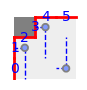

[2, 1, 3] [2, 3, 1]
[(0, 0), (0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (3, 3)]


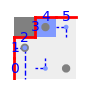

[2, 1, 3] [3, 1, 2]
[(0, 0), (0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (3, 3)]


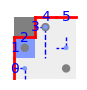

[2, 1, 3] [3, 2, 1]
[(0, 0), (0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (3, 3)]


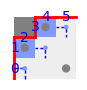

In [33]:
u_test = Permutation([2,1,3])
for v in u_test.bruhat_greater():
        print(u_test,v)
        show(interval_diagram_w_lattice(u_test,v, colors[0]), figsize=[1,1])

[1, 2, 3] [1, 2, 3]


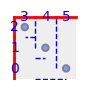

[1, 2, 3] [1, 3, 2]


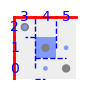

[1, 2, 3] [2, 1, 3]


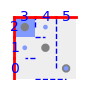

[1, 2, 3] [2, 3, 1]


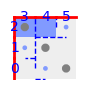

[1, 2, 3] [3, 1, 2]


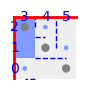

[1, 2, 3] [3, 2, 1]


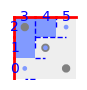

[2, 1, 3] [2, 1, 3]


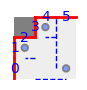

[2, 1, 3] [2, 3, 1]


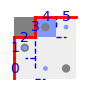

[2, 1, 3] [3, 1, 2]


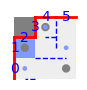

[2, 1, 3] [3, 2, 1]


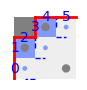

[2, 3, 1] [2, 3, 1]


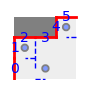

[2, 3, 1] [3, 2, 1]


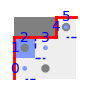

[3, 1, 2] [3, 1, 2]


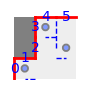

[3, 1, 2] [3, 2, 1]


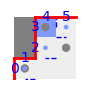

[3, 2, 1] [3, 2, 1]


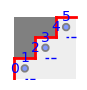

In [16]:
#greys are u, blues are v
for u in dominant_elements(W):
    for v in u.bruhat_greater():
        print(u,v)
        show(interval_diagram_w_lattice(u,v, colors[0]), figsize=[1,1])
        

In [259]:
D.pp()

O O . 
O . . 
. . . 


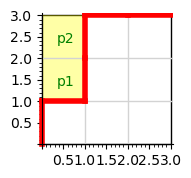

In [50]:

# path as steps N and E (up and right)
path = "NENNEE"   # moves along grid edges from (0,0) to (3,3)
assert len(path) == 2*n and path.count('E') == n and path.count('N') == n

# Square and grid
square = polygon([[0,0],[n,0],[n,n],[0,n]], color='white', edgecolor='black')
grid_lines = []
for i in range(1, n):
    grid_lines.append(line([(i,0),(i,n)], color='lightgray'))
    grid_lines.append(line([(0,i),(n,i)], color='lightgray'))

# Which cells contain the marked points?
# We'll treat cells by their lower-left corner coordinates (cx,cy) with 0<=cx,cy<=n-1
marked_cells = [(0,1), (0,2)]   # as you said: cells in column 0 rows 1 and 2
# highlight those cells
cell_patches = []
for (cx,cy) in marked_cells:
    # draw a semi-transparent rectangle for the whole unit cell
    cell_patches.append(polygon([[cx,cy],[cx+1,cy],[cx+1,cy+1],[cx,cy+1]], color='yellow', alpha=0.35))

# Place the actual marked interior points somewhere inside the cells (e.g., center)
marked_points = [ (cx+0.5, cy+0.5) for (cx,cy) in marked_cells ]
marks = [point(p, size=40, color='green') for p in marked_points]
mark_labels = [text("p%d" % (i+1), (p[0]+0.05, p[1]-0.05), fontsize=10, color='green') for i,p in enumerate(marked_points)]

# Build the lattice path vertices starting at (0,0) walking on grid vertices
pts = [(0,0)]
x,y = 0,0
for ch in path:
    if ch == 'E':
        x += 1
    elif ch == 'N':
        y += 1
    pts.append((x,y))

# We want the path to run along edges so it "goes around" the marked cells: in this
# example NENNEE already runs up along x=0 from y=0->1->2->3 etc and then right,
# skirting the left side of the marked cells.
# Draw segments (with arrows optional)
segments = []
for i in range(len(pts)-1):
    a = pts[i]; b = pts[i+1]
    segments.append(line([a,b], thickness=4, color='red'))



plot_elements = square + sum(grid_lines) + sum(cell_patches) + sum(segments) + sum(marks) + sum(mark_labels)
show(plot_elements, figsize=[2,2])

frozenset({[1, 2, 3, 4], [1, 2, 4, 3]})


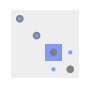

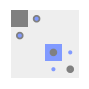

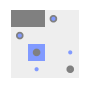

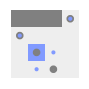

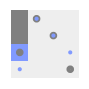

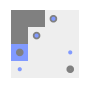

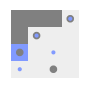

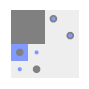

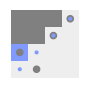

---
frozenset({[1, 2, 3, 4], [1, 3, 2, 4]})


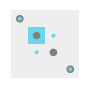

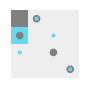

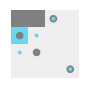

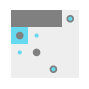

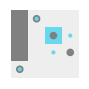

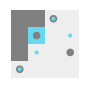

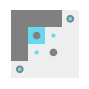

---
frozenset({[1, 2, 3, 4], [1, 2, 4, 3], [1, 3, 2, 4], [1, 3, 4, 2]})


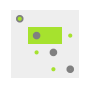

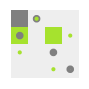

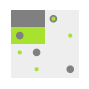

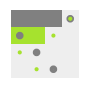

---
frozenset({[1, 2, 3, 4], [1, 4, 2, 3], [1, 2, 4, 3], [1, 3, 2, 4]})


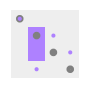

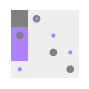

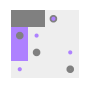

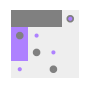

---
frozenset({[1, 2, 3, 4], [1, 4, 2, 3], [1, 2, 4, 3], [1, 3, 4, 2], [1, 4, 3, 2], [1, 3, 2, 4]})


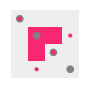

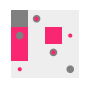

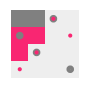

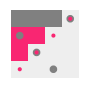

---
frozenset({[1, 2, 3, 4], [2, 1, 3, 4]})


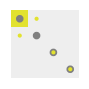

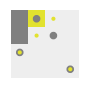

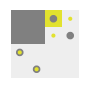

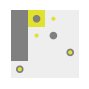

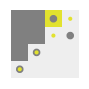

---
frozenset({[1, 2, 3, 4], [2, 1, 3, 4], [1, 2, 4, 3], [2, 1, 4, 3]})


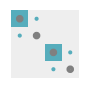

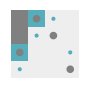

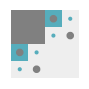

---
frozenset({[1, 3, 2, 4], [2, 1, 3, 4], [2, 3, 1, 4], [1, 2, 3, 4]})


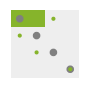

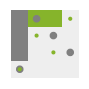

---
frozenset({[2, 3, 4, 1], [1, 3, 4, 2], [2, 3, 1, 4], [1, 3, 2, 4], [1, 2, 3, 4], [1, 2, 4, 3], [2, 1, 4, 3], [2, 1, 3, 4]})


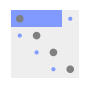

---
frozenset({[1, 4, 2, 3], [2, 4, 1, 3], [1, 3, 2, 4], [2, 3, 1, 4], [1, 2, 3, 4], [1, 2, 4, 3], [2, 1, 4, 3], [2, 1, 3, 4]})


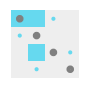

---
frozenset({[2, 3, 4, 1], [1, 4, 2, 3], [1, 3, 4, 2], [2, 4, 1, 3], [2, 1, 3, 4], [2, 3, 1, 4], [1, 3, 2, 4], [1, 2, 3, 4], [1, 2, 4, 3], [2, 4, 3, 1], [2, 1, 4, 3], [1, 4, 3, 2]})


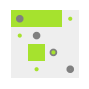

---
frozenset({[1, 2, 3, 4], [2, 1, 3, 4], [3, 1, 2, 4], [1, 3, 2, 4]})


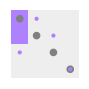

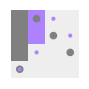

---
frozenset({[1, 3, 4, 2], [1, 3, 2, 4], [1, 2, 3, 4], [3, 1, 2, 4], [1, 2, 4, 3], [2, 1, 4, 3], [2, 1, 3, 4], [3, 1, 4, 2]})


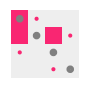

---
frozenset({[1, 2, 3, 4], [3, 2, 1, 4], [3, 1, 2, 4], [2, 1, 3, 4], [1, 3, 2, 4], [2, 3, 1, 4]})


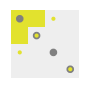

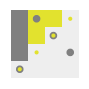

---
frozenset({[2, 3, 4, 1], [1, 3, 4, 2], [2, 3, 1, 4], [1, 3, 2, 4], [1, 2, 3, 4], [3, 1, 2, 4], [3, 2, 4, 1], [2, 1, 4, 3], [1, 2, 4, 3], [2, 1, 3, 4], [3, 2, 1, 4], [3, 1, 4, 2]})


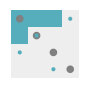

---
frozenset({[1, 4, 2, 3], [1, 3, 4, 2], [2, 4, 1, 3], [2, 1, 3, 4], [2, 3, 1, 4], [1, 3, 2, 4], [1, 2, 3, 4], [3, 1, 2, 4], [1, 2, 4, 3], [2, 1, 4, 3], [1, 4, 3, 2], [3, 2, 1, 4], [3, 1, 4, 2], [3, 4, 1, 2]})


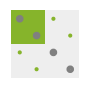

---
frozenset({[1, 3, 4, 2], [2, 3, 1, 4], [1, 2, 3, 4], [3, 1, 2, 4], [1, 2, 4, 3], [2, 4, 3, 1], [1, 4, 3, 2], [3, 2, 1, 4], [2, 3, 4, 1], [1, 4, 2, 3], [2, 4, 1, 3], [1, 3, 2, 4], [3, 4, 2, 1], [3, 2, 4, 1], [2, 1, 4, 3], [2, 1, 3, 4], [3, 1, 4, 2], [3, 4, 1, 2]})


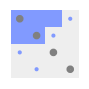

---
frozenset({[1, 4, 2, 3], [1, 3, 2, 4], [1, 2, 3, 4], [3, 1, 2, 4], [1, 2, 4, 3], [4, 1, 2, 3], [2, 1, 4, 3], [2, 1, 3, 4]})


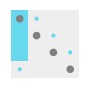

---
frozenset({[1, 4, 2, 3], [1, 3, 4, 2], [2, 1, 3, 4], [1, 3, 2, 4], [4, 1, 3, 2], [1, 2, 3, 4], [3, 1, 2, 4], [1, 2, 4, 3], [4, 1, 2, 3], [2, 1, 4, 3], [1, 4, 3, 2], [3, 1, 4, 2]})


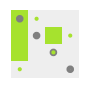

---
frozenset({[1, 4, 2, 3], [4, 2, 1, 3], [2, 4, 1, 3], [2, 3, 1, 4], [1, 3, 2, 4], [1, 2, 3, 4], [3, 1, 2, 4], [1, 2, 4, 3], [4, 1, 2, 3], [2, 1, 4, 3], [2, 1, 3, 4], [3, 2, 1, 4]})


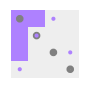

---
frozenset({[1, 3, 4, 2], [2, 3, 1, 4], [1, 2, 3, 4], [3, 1, 2, 4], [1, 2, 4, 3], [2, 4, 3, 1], [1, 4, 3, 2], [3, 2, 1, 4], [4, 1, 3, 2], [1, 4, 2, 3], [2, 3, 4, 1], [4, 2, 1, 3], [2, 4, 1, 3], [1, 3, 2, 4], [3, 2, 4, 1], [4, 1, 2, 3], [2, 1, 4, 3], [4, 2, 3, 1], [2, 1, 3, 4], [3, 1, 4, 2]})


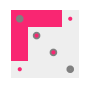

---
frozenset({[1, 3, 4, 2], [2, 3, 1, 4], [1, 2, 3, 4], [3, 1, 2, 4], [1, 2, 4, 3], [1, 4, 3, 2], [3, 2, 1, 4], [4, 1, 3, 2], [1, 4, 2, 3], [4, 2, 1, 3], [2, 4, 1, 3], [4, 3, 1, 2], [1, 3, 2, 4], [4, 1, 2, 3], [2, 1, 4, 3], [2, 1, 3, 4], [3, 1, 4, 2], [3, 4, 1, 2]})


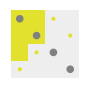

---
frozenset({[1, 3, 4, 2], [2, 3, 1, 4], [1, 2, 3, 4], [3, 1, 2, 4], [1, 2, 4, 3], [2, 4, 3, 1], [4, 3, 2, 1], [1, 4, 3, 2], [3, 2, 1, 4], [4, 1, 3, 2], [1, 4, 2, 3], [2, 3, 4, 1], [4, 2, 1, 3], [2, 4, 1, 3], [4, 3, 1, 2], [1, 3, 2, 4], [3, 4, 2, 1], [3, 2, 4, 1], [4, 1, 2, 3], [2, 1, 4, 3], [4, 2, 3, 1], [2, 1, 3, 4], [3, 1, 4, 2], [3, 4, 1, 2]})


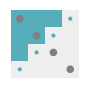

---
frozenset({[1, 2, 3, 4], [3, 2, 1, 4]})


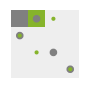

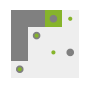

---
frozenset({[1, 2, 3, 4], [1, 2, 4, 3], [3, 2, 4, 1], [3, 2, 1, 4]})


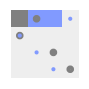

---
frozenset({[1, 2, 3, 4], [1, 2, 4, 3], [4, 2, 1, 3], [3, 2, 1, 4]})


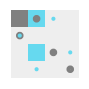

---
frozenset({[1, 2, 3, 4], [1, 2, 4, 3], [4, 2, 1, 3], [3, 2, 4, 1], [4, 2, 3, 1], [3, 2, 1, 4]})


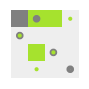

---
frozenset({[1, 3, 2, 4], [2, 3, 1, 4], [3, 2, 1, 4], [1, 2, 3, 4]})


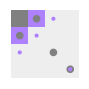

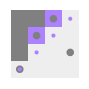

---
frozenset({[2, 3, 4, 1], [1, 3, 4, 2], [2, 3, 1, 4], [1, 3, 2, 4], [1, 2, 3, 4], [1, 2, 4, 3], [3, 2, 4, 1], [3, 2, 1, 4]})


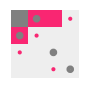

---
frozenset({[4, 2, 1, 3], [1, 3, 4, 2], [4, 3, 1, 2], [2, 3, 1, 4], [1, 3, 2, 4], [1, 2, 3, 4], [1, 2, 4, 3], [3, 2, 1, 4]})


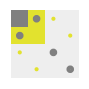

---
frozenset({[2, 3, 4, 1], [4, 2, 1, 3], [1, 3, 4, 2], [4, 3, 1, 2], [2, 3, 1, 4], [1, 3, 2, 4], [1, 2, 3, 4], [1, 2, 4, 3], [3, 2, 4, 1], [4, 2, 3, 1], [4, 3, 2, 1], [3, 2, 1, 4]})


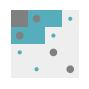

---
frozenset({[1, 4, 2, 3], [4, 2, 1, 3], [2, 4, 1, 3], [2, 3, 1, 4], [1, 3, 2, 4], [1, 2, 3, 4], [1, 2, 4, 3], [3, 2, 1, 4]})


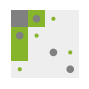

---
frozenset({[2, 3, 4, 1], [1, 4, 2, 3], [4, 2, 1, 3], [1, 3, 4, 2], [2, 4, 1, 3], [2, 3, 1, 4], [1, 3, 2, 4], [1, 2, 3, 4], [1, 2, 4, 3], [3, 2, 4, 1], [2, 4, 3, 1], [4, 2, 3, 1], [1, 4, 3, 2], [3, 2, 1, 4]})


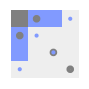

---
frozenset({[1, 4, 2, 3], [4, 2, 1, 3], [1, 3, 4, 2], [2, 4, 1, 3], [4, 3, 1, 2], [2, 3, 1, 4], [1, 3, 2, 4], [1, 2, 3, 4], [1, 2, 4, 3], [1, 4, 3, 2], [3, 2, 1, 4], [3, 4, 1, 2]})


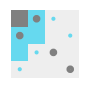

---
frozenset({[1, 3, 4, 2], [2, 3, 1, 4], [1, 2, 3, 4], [1, 2, 4, 3], [2, 4, 3, 1], [4, 3, 2, 1], [3, 2, 1, 4], [2, 3, 4, 1], [1, 4, 2, 3], [4, 2, 1, 3], [2, 4, 1, 3], [4, 3, 1, 2], [1, 3, 2, 4], [3, 4, 2, 1], [3, 2, 4, 1], [4, 2, 3, 1], [1, 4, 3, 2], [3, 4, 1, 2]})


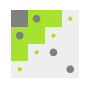

---
frozenset({[1, 2, 3, 4], [4, 2, 3, 1]})


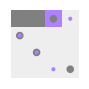

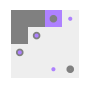

---
frozenset({[1, 2, 3, 4], [1, 2, 4, 3], [3, 2, 4, 1], [4, 2, 3, 1]})


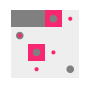

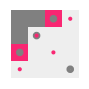

---
frozenset({[1, 2, 3, 4], [4, 2, 3, 1], [1, 3, 2, 4], [4, 3, 2, 1]})


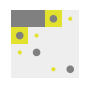

---
frozenset({[2, 3, 4, 1], [1, 3, 4, 2], [1, 3, 2, 4], [1, 2, 3, 4], [1, 2, 4, 3], [3, 2, 4, 1], [4, 3, 2, 1], [4, 2, 3, 1]})


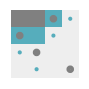

---
frozenset({[1, 4, 2, 3], [1, 3, 2, 4], [3, 4, 2, 1], [1, 2, 3, 4], [1, 2, 4, 3], [3, 2, 4, 1], [4, 3, 2, 1], [4, 2, 3, 1]})


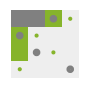

---
frozenset({[2, 3, 4, 1], [1, 4, 2, 3], [1, 3, 4, 2], [1, 3, 2, 4], [3, 4, 2, 1], [1, 2, 3, 4], [1, 2, 4, 3], [3, 2, 4, 1], [2, 4, 3, 1], [4, 3, 2, 1], [4, 2, 3, 1], [1, 4, 3, 2]})


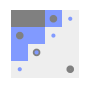

---
frozenset({[1, 2, 3, 4], [1, 4, 3, 2]})


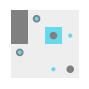

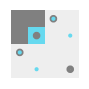

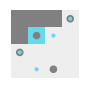

---
frozenset({[1, 2, 3, 4], [1, 4, 3, 2], [2, 1, 3, 4], [2, 4, 3, 1]})


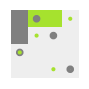

---
frozenset({[1, 2, 3, 4], [2, 1, 3, 4], [1, 4, 3, 2], [4, 1, 3, 2]})


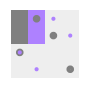

---
frozenset({[1, 2, 3, 4], [2, 4, 3, 1], [4, 2, 3, 1], [1, 4, 3, 2], [2, 1, 3, 4], [4, 1, 3, 2]})


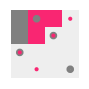

---
frozenset({[1, 2, 3, 4], [1, 4, 3, 2], [1, 2, 4, 3], [1, 3, 4, 2]})


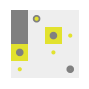

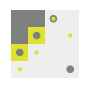

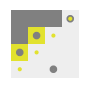

---
frozenset({[2, 3, 4, 1], [1, 3, 4, 2], [2, 1, 3, 4], [1, 2, 3, 4], [1, 2, 4, 3], [2, 4, 3, 1], [2, 1, 4, 3], [1, 4, 3, 2]})


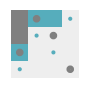

---
frozenset({[1, 4, 3, 2], [1, 3, 4, 2], [4, 1, 3, 2], [1, 2, 3, 4], [1, 2, 4, 3], [2, 1, 4, 3], [2, 1, 3, 4], [3, 1, 4, 2]})


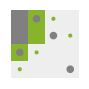

---
frozenset({[2, 3, 4, 1], [1, 4, 3, 2], [1, 3, 4, 2], [4, 1, 3, 2], [1, 2, 3, 4], [1, 2, 4, 3], [3, 2, 4, 1], [2, 1, 4, 3], [2, 4, 3, 1], [4, 2, 3, 1], [2, 1, 3, 4], [3, 1, 4, 2]})


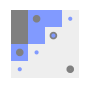

---
frozenset({[1, 2, 3, 4], [1, 4, 3, 2], [2, 4, 3, 1], [4, 2, 3, 1]})


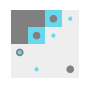

---
frozenset({[2, 3, 4, 1], [1, 3, 4, 2], [1, 2, 3, 4], [1, 2, 4, 3], [3, 2, 4, 1], [2, 4, 3, 1], [4, 2, 3, 1], [1, 4, 3, 2]})


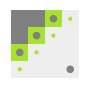

---


In [53]:
shifted_intervals = [];
pairs_grouped_by_interval = {}

def shifted_interval (u, v): 
    W = u.parent();
    interval = set()
    for x in W.bruhat_interval(u, W(v)):
        interval.add(u^(-1)*x) 
    return frozenset(interval)

for u in dominant_elements(W): 
    for v in u.bruhat_greater():
        interval = shifted_interval(u,v)

        if interval in shifted_intervals:
            i = shifted_intervals.index(interval)
        else:
            i = len(shifted_intervals) 
            pairs_grouped_by_interval[i] = [] 
            shifted_intervals.append(frozenset(interval))
            
        pairs_grouped_by_interval[i].append((u,v)) 
        
c=0

for i in pairs_grouped_by_interval:
    if i > 0:
        print(shifted_intervals[i])
        for (u, v) in pairs_grouped_by_interval[i]:
            show(interval_diagram(u, v, colors[c % 8]), figsize=[1,1]) 
        c=c+1
        print("---")

In [8]:
c

7

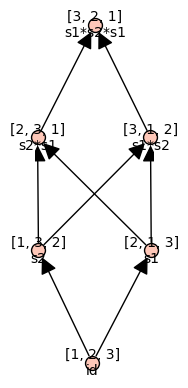

In [16]:
P = W.bruhat_poset()

labels = {}
for w in W:
    # one-line permutation string, e.g. '213'
    one_line = Permutation(w)
    # reduced_word() returns a list like [1,2,1] (Sage Integers); convert to 's1*s2*s1'
    rw = w.reduced_word()
    rw_str = "*".join("s{}".format(int(i)) for i in rw) if rw else "id"
    # include newline so label shows two lines (depends on renderer)
    labels[w] = "{}\n{}".format(one_line, rw_str)

P.show(element_labels=labels, figsize=[4,4], vertex_size=100, fontsize=10)

In [8]:
Permutation(s[1]*s[2]*s[1])

[3, 2, 1]

In [1]:
def all_perfect_matchings_graph(G):
    """
    Return list of all perfect matchings of graph G (as lists of edges (u,v) with u<v).
    G must have an even number of vertices.
    Warning: exponential in size of G.
    """
    V = list(G.vertices())
    n = len(V)
    if n % 2 == 1:
        return []
    # map vertex to index for consistent ordering
    V.sort()
    used = {v: False for v in V}
    results = []

    def backtrack(current):
        # find first unused vertex
        try:
            v = next(w for w in V if not used[w])
        except StopIteration:
            results.append(list(current))
            return
        used[v] = True
        for u in V:
            if not used[u] and G.has_edge(v, u):
                used[u] = True
                a,b = (v,u) if v <= u else (u,v)
                current.append((a,b))
                backtrack(current)
                current.pop()
                used[u] = False
        used[v] = False

    backtrack([])
    return results


In [2]:
n=3
G=graphs.CompleteGraph(2*n)
matchings = all_perfect_matchings_graph(G)

In [3]:
#fact check
len(matchings) == (2*n-1).multifactorial(2)

True

In [4]:
matchings

[[(0, 1), (2, 3), (4, 5)],
 [(0, 1), (2, 4), (3, 5)],
 [(0, 1), (2, 5), (3, 4)],
 [(0, 2), (1, 3), (4, 5)],
 [(0, 2), (1, 4), (3, 5)],
 [(0, 2), (1, 5), (3, 4)],
 [(0, 3), (1, 2), (4, 5)],
 [(0, 3), (1, 4), (2, 5)],
 [(0, 3), (1, 5), (2, 4)],
 [(0, 4), (1, 2), (3, 5)],
 [(0, 4), (1, 3), (2, 5)],
 [(0, 4), (1, 5), (2, 3)],
 [(0, 5), (1, 2), (3, 4)],
 [(0, 5), (1, 3), (2, 4)],
 [(0, 5), (1, 4), (2, 3)]]